<a href="https://colab.research.google.com/github/Hajlaoui-Rayhan/Roses_Green_House_Cultivation_Model/blob/main/Roses_Green_House_Cultivation_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U --pre tensorflow tensorflow_datasets
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.7/489.7 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 81.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 70.1 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.3
    Uninstalling tensorboard-2.12.3:
      Successfully uninstalled tensorboard-2.12.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.12.0
    Uninstalling tensorflow-2.12.0:
      Successfully un

In [50]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.models import Sequential
from keras.layers import Input, Add, Dense, Activation, BatchNormalization, Flatten, Conv1D
from sklearn.model_selection import train_test_split
from IPython import display
import pandas as pd


In [51]:
df = pd.read_excel(r'/content/sample_data/Roses-greenhouse-cultivation-database-repository-_RosesGreenhDB_.xlsx')

print(df)
training_data = df.sample(frac=0.8, random_state=25)
testing_data = df.drop(training_data.index)
print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

     HS (Analog)  L (Lux)  T (°)  CO2 (Analog)  HR (%)  clase
0            713     0.83   16.2            76    96.8      1
1            717     2.50   16.2            75    96.5      1
2            717   561.67   16.1            78    96.7      1
3            716   640.00   15.9            79    96.5      1
4            718   568.33   16.1            79    96.6      1
..           ...      ...    ...           ...     ...    ...
348          550   280.83   21.0           153    86.7      4
349          549   260.83   20.8           151    84.3      4
350          550   215.00   20.6           148    86.3      4
351          549   215.83   20.4           151    87.8      4
352          544   171.67   20.5           147    90.2      4

[353 rows x 6 columns]
No. of training examples: 282
No. of testing examples: 71


In [52]:
X_train = training_data.iloc[:, :-1].values
y_train = training_data.iloc[:, -1].values - 1  # Convert class labels from 1-4 to 0-3
print(X_train)
print(y_train)

[[8.010000e+02 5.461250e+04 2.900000e+01 1.590000e+02 6.180000e+01]
 [5.790000e+02 2.495000e+03 2.160000e+01 1.730000e+02 8.560000e+01]
 [5.770000e+02 2.797500e+03 2.200000e+01 1.760000e+02 8.430000e+01]
 ...
 [7.740000e+02 4.325000e+02 2.100000e+01 1.500000e+02 9.150000e+01]
 [6.180000e+02 4.026333e+04 2.390000e+01 2.230000e+02 7.510000e+01]
 [5.300000e+02 1.246083e+04 3.070000e+01 1.890000e+02 7.470000e+01]]
[0 3 3 0 1 3 2 2 0 2 3 1 2 2 2 0 3 1 0 1 3 3 1 1 2 3 0 0 0 1 0 0 2 2 0 2 1
 1 3 1 1 2 0 3 0 2 2 0 0 3 0 2 1 1 1 1 1 0 1 2 1 2 0 2 0 2 3 1 2 0 0 3 0 0
 0 3 0 0 0 0 2 3 2 2 0 2 3 1 0 0 3 0 0 3 3 2 0 0 1 3 3 0 0 0 2 1 3 2 1 2 0
 1 2 0 1 2 1 0 0 3 1 0 0 2 0 2 2 2 0 2 0 2 0 0 3 1 0 2 0 0 2 3 1 3 1 1 0 0
 3 2 0 1 2 1 3 1 0 1 1 0 0 0 1 2 2 2 0 3 2 2 2 3 3 1 2 0 0 0 0 0 0 2 1 1 2
 2 0 3 0 3 3 0 2 2 0 0 0 0 0 1 0 1 1 2 0 0 1 0 2 0 1 3 3 1 2 0 0 0 3 2 2 0
 2 0 3 2 0 0 3 1 0 3 2 2 2 2 2 1 0 0 2 2 1 0 0 0 1 2 2 3 1 0 0 1 2 0 2 0 0
 3 2 2 1 0 0 1 0 1 0 2 0 1 1 1 1 0 3 0 3 0 1 2]


In [53]:
# Define the hyperparameters
learning_rate = 0.000416
num_hidden_layers = 5
num_neurons = 265
activation_function = 'tanh'
batch_size = 36
l2_weight_decay = 0.007963
num_classes = 4
num_features = 5
num_iterations = 80

In [54]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(265, input_shape=(5,), activation='tanh'),
    tf.keras.layers.Dense(265, activation='tanh'),
    tf.keras.layers.Dense(265, activation='tanh'),
    tf.keras.layers.Dense(265, activation='tanh'),
    tf.keras.layers.Dense(4, activation='softmax')
])


In [55]:
# Compile the model
adam = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [78]:
# Train the model
history = model.fit(X_train, y_train, batch_size=36, epochs=80)

Epoch 1/80
8/8 [==============================] - 0s 29ms/step - loss: 0.5057 - accuracy: 0.7411
Epoch 2/80
8/8 [==============================] - 0s 32ms/step - loss: 0.5086 - accuracy: 0.7482
Epoch 3/80
8/8 [==============================] - 0s 29ms/step - loss: 0.5099 - accuracy: 0.7518
Epoch 4/80
8/8 [==============================] - 0s 26ms/step - loss: 0.5061 - accuracy: 0.7482
Epoch 5/80
8/8 [==============================] - 0s 24ms/step - loss: 0.5019 - accuracy: 0.7553
Epoch 6/80
8/8 [==============================] - 0s 30ms/step - loss: 0.5066 - accuracy: 0.7411
Epoch 7/80
8/8 [==============================] - 0s 24ms/step - loss: 0.5140 - accuracy: 0.7553
Epoch 8/80
8/8 [==============================] - 0s 22ms/step - loss: 0.5471 - accuracy: 0.7270
Epoch 9/80
8/8 [==============================] - 0s 23ms/step - loss: 0.5277 - accuracy: 0.7482
Epoch 10/80
8/8 [==============================] - 0s 25ms/step - loss: 0.5201 - accuracy: 0.7376
Epoch 11/80
8/8 [============

In [79]:

X_test = testing_data.iloc[:, :-1].values
y_test = (testing_data.iloc[:, -1].values - 1)
print(X_test)
print(y_test)

[[7.170000e+02 5.616700e+02 1.610000e+01 7.800000e+01 9.670000e+01]
 [7.880000e+02 2.334170e+03 2.310000e+01 1.580000e+02 7.200000e+01]
 [7.860000e+02 5.461250e+04 2.800000e+01 1.600000e+02 6.620000e+01]
 [8.200000e+02 7.863330e+03 2.980000e+01 1.570000e+02 5.950000e+01]
 [7.630000e+02 1.222500e+03 2.300000e+01 1.560000e+02 8.090000e+01]
 [7.620000e+02 1.995830e+03 2.310000e+01 1.620000e+02 8.020000e+01]
 [7.630000e+02 1.860000e+03 2.330000e+01 1.620000e+02 7.910000e+01]
 [7.730000e+02 2.313330e+03 2.270000e+01 1.490000e+02 8.210000e+01]
 [7.690000e+02 2.685830e+03 2.260000e+01 1.500000e+02 8.390000e+01]
 [7.750000e+02 1.377500e+03 2.230000e+01 1.470000e+02 8.510000e+01]
 [7.760000e+02 9.825000e+02 2.190000e+01 1.490000e+02 8.670000e+01]
 [7.760000e+02 9.308300e+02 2.170000e+01 1.370000e+02 8.840000e+01]
 [7.730000e+02 6.958300e+02 2.200000e+01 1.500000e+02 8.760000e+01]
 [7.730000e+02 2.983300e+02 2.110000e+01 1.480000e+02 9.060000e+01]
 [7.780000e+02 8.917000e+01 2.040000e+01 1.45000

In [80]:
predictions = model.predict(X_test)
print(predictions)

3/3 [==============================] - 0s 4ms/step
[[9.99998391e-01 2.04775688e-07 2.56267967e-08 1.30674607e-06]
 [9.99949038e-01 3.96856819e-07 9.46525745e-07 4.95657332e-05]
 [3.41055721e-01 3.79627854e-01 2.78795540e-01 5.20884292e-04]
 [2.06640542e-01 2.00613216e-03 1.37079671e-01 6.54273689e-01]
 [9.99793053e-01 5.67915731e-06 6.71863859e-07 2.00627619e-04]
 [9.99895155e-01 4.48689065e-07 6.60622391e-07 1.03537757e-04]
 [9.99548972e-01 4.77702201e-07 5.98745487e-07 4.49981715e-04]
 [9.99937952e-01 4.89819342e-07 1.16030890e-06 6.03642984e-05]
 [9.98527229e-01 3.79202793e-05 1.76239002e-04 1.25837256e-03]
 [9.99981821e-01 6.80619053e-07 1.15120280e-07 1.72598448e-05]
 [9.99980032e-01 1.97620602e-06 6.81168189e-08 1.77897928e-05]
 [9.99991119e-01 9.51527227e-07 4.19288924e-08 7.81966082e-06]
 [9.99985874e-01 9.30760280e-07 5.54308954e-08 1.31308016e-05]
 [9.96554554e-01 1.31162560e-05 2.48717583e-06 3.42985359e-03]
 [9.99983728e-01 1.31781485e-06 2.95994596e-07 1.46571138e-05]
 [9.

In [81]:
predictions=np.argmax(predictions, axis=1)

print(predictions)
confusion_mtx = tf.math.confusion_matrix(y_test, predictions)

[0 0 1 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 2 1 1 2 2 2 2 3 1 2 1 1 1 3 1
 1 1 2 3 3 3 2 1 2 2 2 2 2 3 2 2 2 2 3 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3]


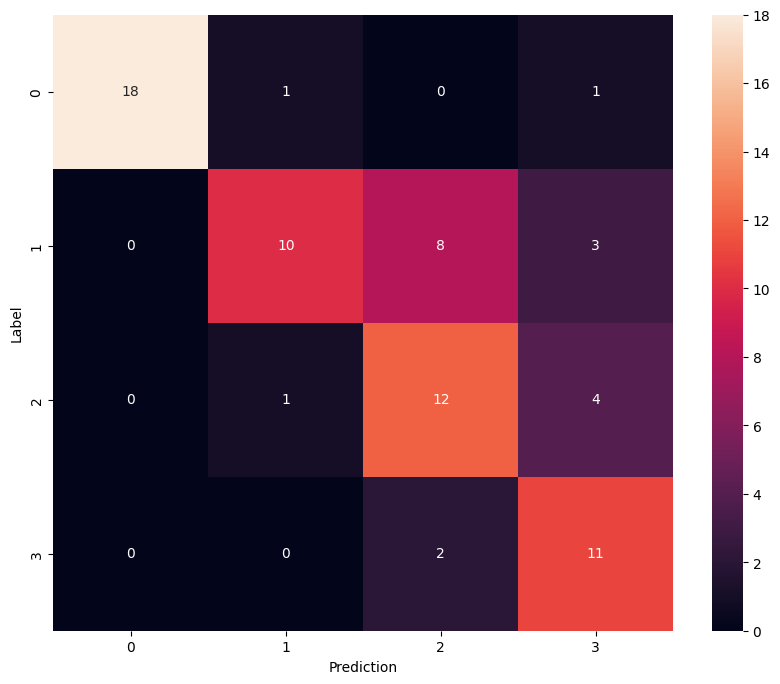

In [82]:

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            xticklabels=['0','1','2','3'],
            yticklabels=['0','1','2','3'],
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [83]:
model.save('rose_predictor.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [84]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()
open('rose_predictor'+ '.tflite','wb').write(tflite_model)


221024

In [85]:
# Function: Convert some hex value into an array for C programming
def hex_to_c_array(hex_data, var_name):

  c_str = ''

  # Create header guard
  c_str += '#ifndef ' + var_name.upper() + '_H\n'
  c_str += '#define ' + var_name.upper() + '_H\n\n'

  # Add array length at top of file
  c_str += '\nunsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

  # Declare C variable
  c_str += 'unsigned char ' + var_name + '[] = {'
  hex_array = []
  for i, val in enumerate(hex_data) :

    # Construct string from hex
    hex_str = format(val, '#04x')

    # Add formatting so each line stays within 80 characters
    if (i + 1) < len(hex_data):
      hex_str += ','
    if (i + 1) % 12 == 0:
      hex_str += '\n '
    hex_array.append(hex_str)

  # Add closing brace
  c_str += '\n ' + format(' '.join(hex_array)) + '\n};\n\n'

  # Close out header guard
  c_str += '#endif //' + var_name.upper() + '_H'

  return c_str


In [86]:
# Write TFLite model to a C source (or header) file
with open('rose_c_model' + '.h', 'w') as file:
  file.write(hex_to_c_array(tflite_model, 'rose_c_model'))